In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Admission_predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.drop_duplicates()
df.shape

(400, 9)

In [6]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [8]:
a = df.describe()
a

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [10]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [11]:
df['CGPA'].sort_values(ascending = False).head()

143    9.92
202    9.91
203    9.87
385    9.82
34     9.80
Name: CGPA, dtype: float64

In [12]:
b = df.groupby('GRE Score').agg({'CGPA':['min','max']})
b

CGPA      
            min   max
GRE Score            
290        7.46  7.56
293        7.80  7.80
294        7.36  7.64
295        7.20  7.86
296        7.28  8.03
297        7.43  7.90
298        7.46  8.54
299        7.34  8.62
300        6.80  8.66
301        7.88  8.47
302        7.25  8.33
303        7.65  8.65
304        7.50  8.73
305        8.13  8.65
306        8.00  8.45
307        7.65  8.52
308        7.90  8.60
309        8.00  8.56
310        7.30  9.04
311        7.46  9.00
312        7.90  8.79
313        8.04  9.00
314        7.64  9.04
315        7.65  8.50
316        7.40  9.00
317        8.12  9.11
318        7.92  9.22
319        8.00  9.04
320        7.70  9.22
321        8.20  9.45
322        8.00  9.36
323        8.44  9.32
324        8.10  9.22
325        8.40  9.17
326        8.76  9.40
327        8.30  9.14
328        9.02  9.50
329        8.56  9.45
330        9.17  9.45
331        8.96  9.80
332        9.10  9.64
333        9.28  9.78
334        8.00  9.87
335        9.44  9.82
336        9.19  9.80
337        9.65  9.65
338        9.23  9.66
339        9.70  9.80
340        9.45  9.92

In [13]:
df.drop(['Serial No.'], axis=1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


<AxesSubplot:>

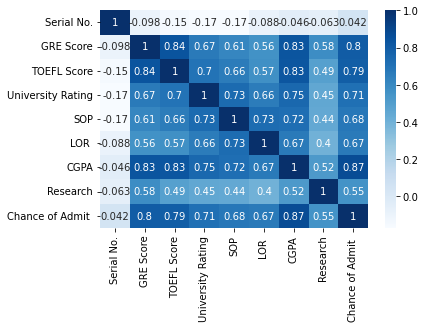

In [14]:
sns.heatmap(df.corr(),cmap='Blues',annot = True)

<AxesSubplot:>

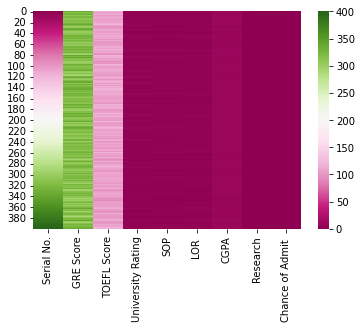

In [15]:
sns.heatmap(data= df, cmap ='PiYG')

<AxesSubplot:xlabel='GRE Score', ylabel='Density'>

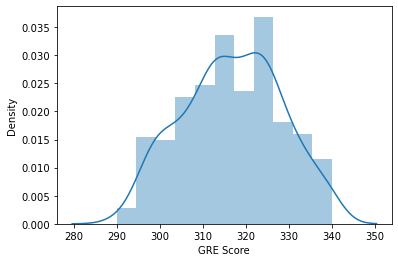

In [16]:
sns.distplot(df['GRE Score'])

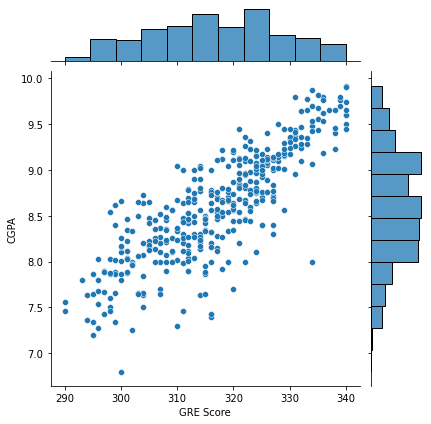

In [17]:
sns.jointplot(x = 'GRE Score',y = 'CGPA',data = df)

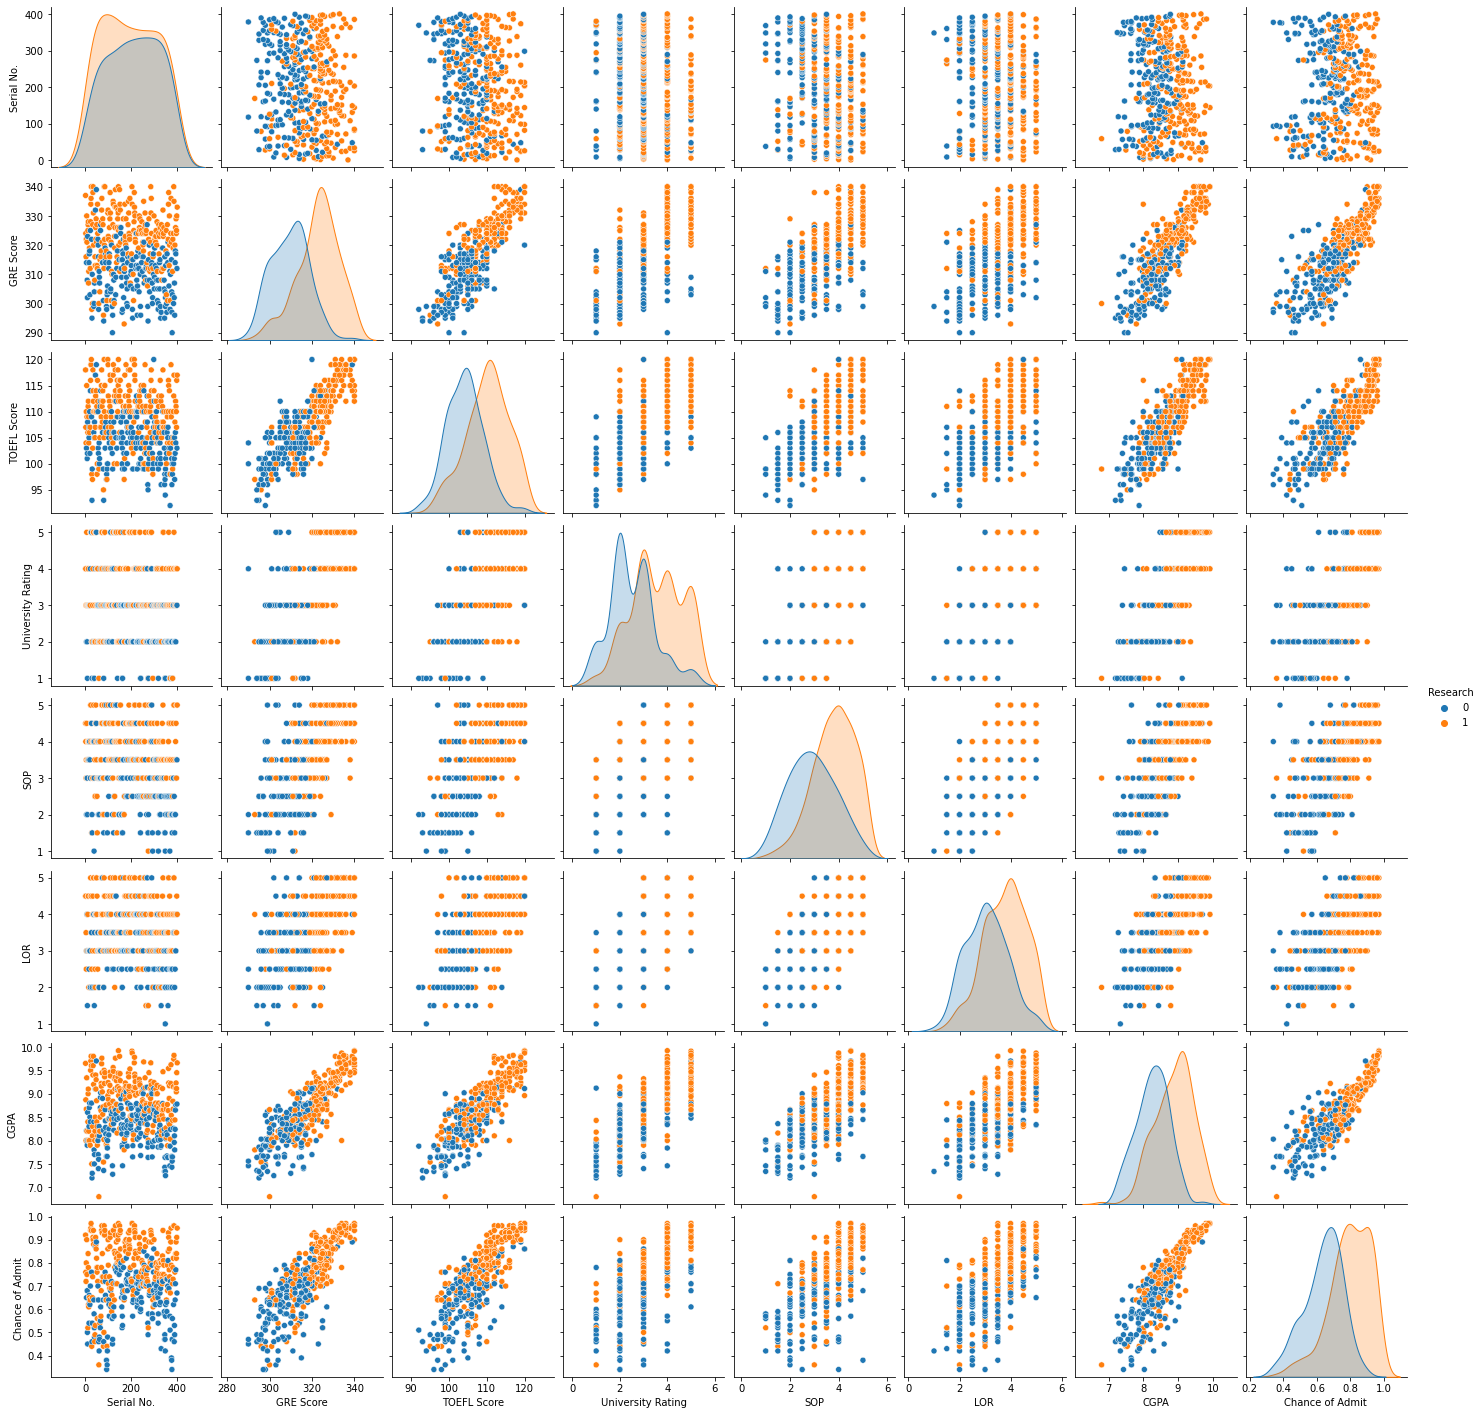

In [18]:
sns.pairplot(df,hue = 'Research')

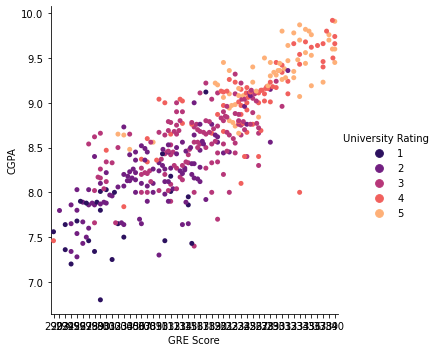

In [19]:
sns.factorplot(x = 'GRE Score',y = 'CGPA',data = df,kind = 'swarm',hue = 'University Rating',palette = 'magma')


In [20]:
from sklearn.model_selection import train_test_split

X = df[['CGPA','GRE Score']]
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [21]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [23]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print('Decision Tree Regressor', (r2_score(y_test, predictions)))

Decision Tree Regressor 0.6404246534067872


In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print('Linear Regressor', (r2_score(y_test, predictions)))

Linear Regressor 0.7478590023432623


In [25]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print('Random Forest Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

Random Forest Regressor 0.07049496493710629


In [26]:
knr = KNeighborsRegressor(n_neighbors = 2)
knr.fit(X_train, y_train)
predictions = knr.predict(X_test)
print('K Nearest Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

K Nearest Regressor 0.07313087583230492


In [27]:
svm = SVR()
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print('Support vector Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

Support vector Regressor 0.08493815654895877


In [28]:
abc = AdaBoostRegressor()
abc.fit(X_train, y_train)
predictions = abc.predict(X_test)
print('Ada Boost Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

Ada Boost Regressor 0.07282930794197393


In [29]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)
print('Ada Boost Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

Ada Boost Regressor 0.06696977089950765


In [30]:
lso = Lasso()
lso.fit(X_train, y_train)
predictions = lso.predict(X_test)
print('lasso Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

lasso Regressor 0.1128983629942429


In [31]:
rdg = Ridge()
rdg.fit(X_train, y_train)
predictions = rdg.predict(X_test)
print('Ridge Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

Ridge Regressor 0.06522380225706223


In [32]:
br = BayesianRidge()
br.fit(X_train, y_train)
predictions = br.predict(X_test)
print('Bayes Ridge Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

Bayes Ridge Regressor 0.0651370984073863


In [33]:
elsn = ElasticNet()
elsn.fit(X_train, y_train)
predictions = elsn.predict(X_test)
print('Elastic Net Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

Elastic Net Regressor 0.08948297970506092


In [34]:
hr = HuberRegressor()
hr.fit(X_train, y_train)
predictions = hr.predict(X_test)
print('Huber Regressor', (np.sqrt(mean_squared_error(y_test, predictions))))

Huber Regressor 0.0647824429208418


<AxesSubplot:>

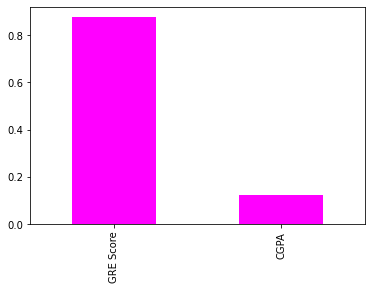

In [35]:
index=df.columns[[1,6]]
importance=pd.Series(dt.feature_importances_,index=index)
importance.nlargest(2).plot(kind="bar",colormap="spring")